# Import des librairies

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import folium
from sklearn.preprocessing import MinMaxScaler

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

!python --version
print('\n'.join(f'{m.__name__} {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

Python 3.9.18
pandas 2.1.4
numpy 1.26.2
seaborn 0.12.2
folium 0.14.0


# Analyse du df past

Maintenant que notre df du passé est crée, on va pouvoir l'analyser et vérifier comment les données ont été récoltés, faire un recensement, faire une analyse exploratoire plus poussée. Suite à ça, on va pouvoir regarder surtout quels pays on pourra choisir pour l'exportation de nos formations grâce à une méthode de scoring ou de l'entonnoir.

In [56]:
df_past = pd.read_csv('Data/EdStatsFinalPast.csv')
display(df_past.head())

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,AFG,Low income,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,870.00,920.00,920.00,1010.00,1070.00,1210.00,1250.00,1490.00,1590.00,1680.00,1900.00,1900.00,1890.00
1,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,13.32,18.66,19.78,29.93,30.08,40.22,46.73,53.25,54.62,56.68,56.69,55.66
2,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.26,1.26,NaN,NaN,NaN,NaN,3.90,NaN,3.76,NaN,NaN,8.66
3,Afghanistan,AFG,Low income,South Asia,"Population, total",SP.POP.TOTL,21979923.00,23064851.00,24118979.00,25070798.00,25893450.00,26616792.00,27294031.00,28004331.00,28803167.00,29708599.00,30696958.00,31731688.00,32758020.00
4,Afghanistan,AFG,Low income,South Asia,Political Stability and Absence of Violence/Te...,PV.EST,-2.04,-2.20,-2.30,-2.07,-2.22,-2.41,-2.69,-2.71,-2.58,-2.50,-2.42,-2.52,-2.41


In [57]:
df_past_copy = df_past.copy()

In [58]:
years_columns = [str(year) for year in range(2002, 2015)]

df_past_long = pd.melt(
    df_past,
    id_vars=['Country Name', 'Country Code', 'Income Group', 'Region', 'Indicator Name', 'Indicator Code'],
    value_vars=years_columns,
    var_name='Year',
    value_name='Value'
)

df_past_long.head()

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,Low income,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2002,870.00
1,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,2002,NaN
2,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2002,NaN
3,Afghanistan,AFG,Low income,South Asia,"Population, total",SP.POP.TOTL,2002,21979923.00
4,Afghanistan,AFG,Low income,South Asia,Political Stability and Absence of Violence/Te...,PV.EST,2002,-2.04


## Création de df par indicateur

In [59]:
def create_df_by_indicator(df, indicator_code):
    # Filtre du df pour chaque "indicator code"
    df_indicator = df_past[df_past['Indicator Code'] == indicator_code]
    # Transforme le df initial en format long
    df_indicator_long = pd.melt(df_indicator, 
                                id_vars=['Country Name', 'Country Code', 'Income Group', 'Region', 'Indicator Name', 'Indicator Code'], 
                                value_vars=years_columns,
                                var_name='Year', 
                                value_name='Value')
    return df_indicator_long

In [60]:
# Boucle pour créer et stocker chaque df en format long dans un dictionnaire
indicators_dict = {
    'NY.GNP.PCAP.PP.CD': 'df_pib',
    'SE.SEC.ENRR': 'df_secondaire',
    'SE.TER.ENRR': 'df_tertiaire',
    'SP.POP.TOTL': 'df_population',
    'PV.EST': 'df_stabilite',
    'IT.NET.USER.ZS': 'df_internet'
}

# Boucle pour créer chaque df en format long et le stocker dans une variable globale
for indicator_code, variable_name in indicators_dict.items():
    globals()[variable_name] = create_df_by_indicator(df_past, indicator_code)

# Exemple pour vérifier le DataFrame pour le PIB en format long
df_pib

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,Low income,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2002,870.00
1,Albania,ALB,Upper middle income,Europe & Central Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2002,4870.00
2,Algeria,DZA,Upper middle income,Middle East & North Africa,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2002,8570.00
3,American Samoa,ASM,Upper middle income,East Asia & Pacific,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2002,NaN
4,Andorra,AND,High income: nonOECD,Europe & Central Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2002,NaN
...,...,...,...,...,...,...,...,...
2595,Virgin Islands (U.S.),VIR,High income: nonOECD,Latin America & Caribbean,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2014,NaN
2596,West Bank and Gaza,PSE,Lower middle income,Middle East & North Africa,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2014,NaN
2597,"Yemen, Rep.",YEM,Lower middle income,Middle East & North Africa,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2014,3730.00
2598,Zambia,ZMB,Lower middle income,Sub-Saharan Africa,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2014,3750.00


## Analyse descriptive

In [61]:
def group_and_describe(df, grouped_column):
    grouped_df = df.groupby(grouped_column).describe()
    return grouped_df

In [62]:
df_past.describe()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,1033.00,1035.00,1052.00,1048.00,1042.00,1052.00,1051.00,1053.00,1054.00,1067.00,1054.00,1032.00,1025.00
mean,5956850.53,6020942.02,5998836.33,6097682.55,6209976.88,6228004.56,6312146.85,6378190.98,6450260.14,6447646.04,6601876.35,6824120.21,6941849.01
std,55201139.92,55743544.66,55879909.00,56569007.55,57308015.76,57603375.17,58192137.92,58689715.19,59204915.01,59376802.70,60270466.10,61438119.52,62185688.34
min,-2.37,-2.57,-3.18,-2.71,-2.83,-3.23,-3.28,-3.31,-3.13,-3.08,-2.86,-2.76,-2.75
25%,1.79,1.90,2.21,2.81,3.35,4.05,4.82,5.25,6.43,7.79,8.34,9.98,10.60
50%,57.19,59.86,61.83,63.69,66.18,68.29,69.06,71.26,72.75,72.20,73.34,77.94,79.98
75%,9720.00,9793.50,10002.50,11300.00,12577.50,13132.50,14370.00,14750.00,15727.50,14930.00,16102.50,18350.00,18320.00
max,1280400000.00,1288400000.00,1296075000.00,1303720000.00,1311020000.00,1317885000.00,1324655000.00,1331260000.00,1337705000.00,1344130000.00,1350695000.00,1357380000.00,1364270000.00


## Analyse par régions

In [63]:
df_pib_region_grouped = group_and_describe(df_pib, 'Region')
df_secondaire_region_grouped = group_and_describe(df_secondaire, 'Region')
df_tertiaire_region_grouped = group_and_describe(df_tertiaire, 'Region')
df_population_region_grouped = group_and_describe(df_population, 'Region')
df_stabilite_region_grouped = group_and_describe(df_stabilite, 'Region')
df_internet_region_grouped = group_and_describe(df_internet, 'Region')

In [64]:
df_pib_region_grouped

Value                                      \
                            count     mean      std      min      25%   
Region                                                                  
East Asia & Pacific        390.00 17011.54 22392.93  1200.00  3357.50   
Europe & Central Asia      594.00 23095.56 15559.70  1090.00  9380.00   
Latin America & Caribbean  428.00 11245.21  6119.82  1340.00  6712.50   
Middle East & North Africa 233.00 29285.84 28752.13  1810.00  9250.00   
North America               33.00 48549.09 12869.44 30070.00 39230.00   
South Asia                 104.00  4569.52  3349.30   870.00  1967.50   
Sub-Saharan Africa         588.00  3693.25  4855.97   310.00  1170.00   

                                                        
                                50%      75%       max  
Region                                                  
East Asia & Pacific         5815.00 24017.50 118020.00  
Europe & Central Asia      20475.00 34290.00  72870.00  
Latin America & Caribbean   9985.00 15297.50  30200.00  
Middle East & North Africa 16610.00 38550.00 121570.00  
North America              44740.00 54000.00  75090.00  
South Asia                  3635.00  5790.00  16150.00  
Sub-Saharan Africa          1765.00  3200.00  28490.00

In [65]:
df_secondaire_region_grouped

Value                                             
                            count   mean   std   min   25%   50%    75%    max
Region                                                                        
East Asia & Pacific        265.00  83.96 25.27 22.85 69.61 86.85  99.24 156.19
Europe & Central Asia      524.00 101.68 12.74 73.00 94.44 99.42 107.60 164.81
Latin America & Caribbean  365.00  87.07 14.23 42.81 76.39 88.74  97.66 120.33
Middle East & North Africa 205.00  81.42 19.94 16.76 75.30 86.91  94.26 110.46
North America               32.00  92.18 10.94 72.62 80.42 95.41 101.15 110.27
South Asia                  78.00  53.01 17.75 13.32 44.96 51.72  62.08  99.72
Sub-Saharan Africa         363.00  41.20 22.51  6.86 24.53 36.33  52.05  98.82

In [66]:
df_tertiaire_region_grouped

Value                                           
                            count  mean   std   min   25%   50%   75%    max
Region                                                                      
East Asia & Pacific        220.00 41.23 26.37  2.48 17.39 33.68 61.81  99.66
Europe & Central Asia      535.00 57.19 20.46  7.98 44.07 59.46 71.85 113.87
Latin America & Caribbean  236.00 38.69 22.60  7.85 21.91 33.21 49.29 119.78
Middle East & North Africa 201.00 30.64 15.79  1.02 18.20 29.99 42.77  67.80
North America               22.00 63.03 29.15 25.93 30.22 81.39 86.25  96.32
South Asia                  70.00 10.33  5.66  0.21  6.14 10.08 13.43  25.54
Sub-Saharan Africa         341.00  7.12  6.43  0.40  2.92  5.25  9.30  39.73

In [67]:
df_population_region_grouped

Value                                      \
                            count         mean          std       min   
Region                                                                  
East Asia & Pacific        416.00  66464032.12 231446423.95   9635.00   
Europe & Central Asia      663.00  15668741.97  26146574.78  28121.00   
Latin America & Caribbean  481.00  15724338.23  35920071.17  44738.00   
Middle East & North Africa 273.00  17772881.51  22326660.55 395969.00   
North America               39.00 112323728.18 137805167.11  62912.00   
South Asia                 104.00 197808893.65 384304143.72 297000.00   
Sub-Saharan Africa         607.00  17811531.38  26275235.77  82475.00   

                                                                               
                                   25%         50%          75%           max  
Region                                                                         
East Asia & Pacific          172678.25  3436198.00  34456067.75 1364270000.00  
Europe & Central Asia       2250960.50  5413971.00  11032686.50  145306046.00  
Latin America & Caribbean    272258.00  3805214.00  11354651.00  204213133.00  
Middle East & North Africa  2998083.00  7053700.00  26316609.00   91812566.00  
North America                 65131.50 33245773.00 294160948.50  318563456.00  
South Asia                 14398362.00 26678947.50 153910229.25 1293859294.00  
Sub-Saharan Africa          2194395.50 10396861.00  19983482.00  176460502.00

In [68]:
df_stabilite_region_grouped

Value                                        
                            count  mean  std   min   25%   50%   75%  max
Region                                                                   
East Asia & Pacific        419.00  0.37 0.85 -2.10 -0.28  0.57  1.09 1.50
Europe & Central Asia      683.00  0.43 0.80 -2.02 -0.13  0.59  1.05 1.94
Latin America & Caribbean  476.00  0.07 0.77 -2.38 -0.47  0.10  0.79 1.38
Middle East & North Africa 273.00 -0.52 1.08 -3.18 -1.33 -0.47  0.31 1.60
North America               39.00  0.76 0.34 -0.23  0.59  0.83  0.99 1.22
South Asia                 104.00 -1.09 1.14 -2.81 -1.89 -1.35 -0.36 1.28
Sub-Saharan Africa         615.00 -0.54 0.95 -3.31 -1.21 -0.36  0.14 1.20

In [69]:
df_internet_region_grouped

Value                                          
                            count  mean   std   min   25%   50%   75%   max
Region                                                                     
East Asia & Pacific        398.00 26.77 27.25  0.00  4.60 13.81 48.58 89.11
Europe & Central Asia      676.00 49.89 27.17  0.06 27.90 52.69 71.76 98.16
Latin America & Caribbean  477.00 28.76 18.60  0.89 12.80 27.00 40.27 83.78
Middle East & North Africa 273.00 28.16 23.87  0.49  8.53 21.18 43.40 91.49
North America               39.00 74.07 10.56 52.03 66.96 73.00 82.65 96.80
South Asia                  98.00  7.76  9.33  0.00  1.85  5.08  9.00 49.28
Sub-Saharan Africa         596.00  5.97  8.83  0.03  0.95  2.62  6.60 51.25

In [70]:
# Liste des indicateurs avec codes et noms
indicators_unique = df_past_long[['Indicator Code', 'Indicator Name']].drop_duplicates()

In [71]:
# Créer une liste des indicateurs avec leurs codes et noms
indicators = list(zip(indicators_unique['Indicator Code'], indicators_unique['Indicator Name']))

### Boxplots sur l'année 2011

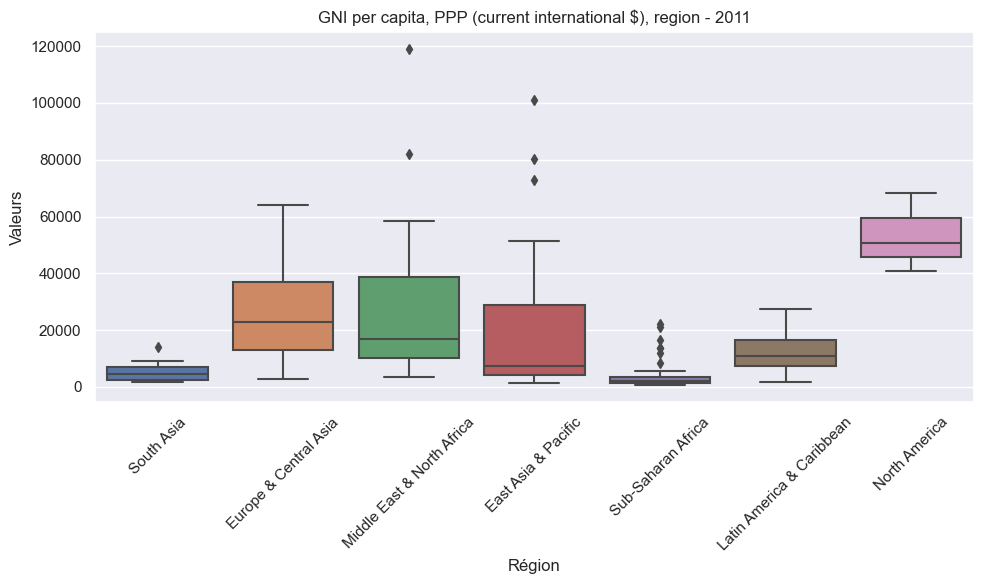

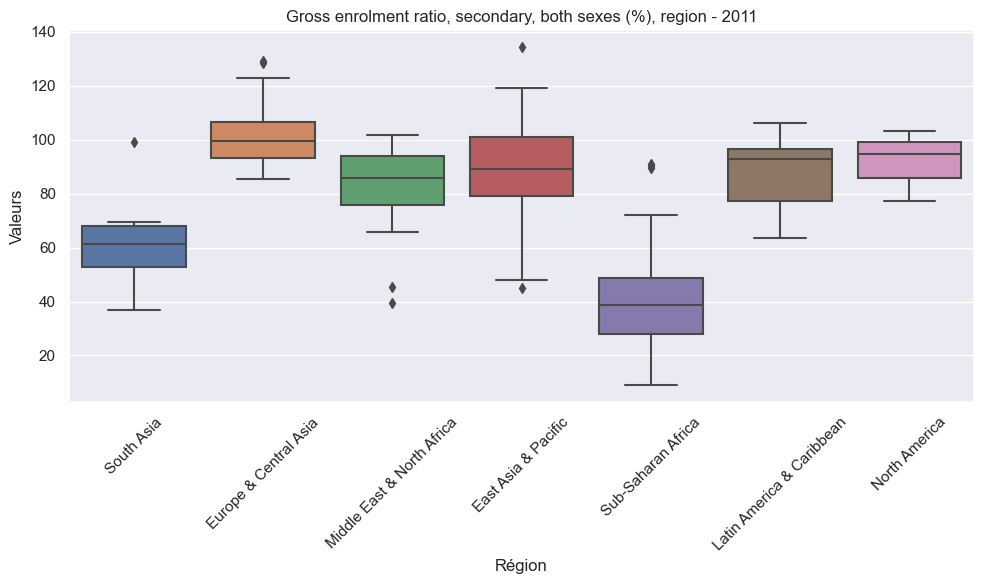

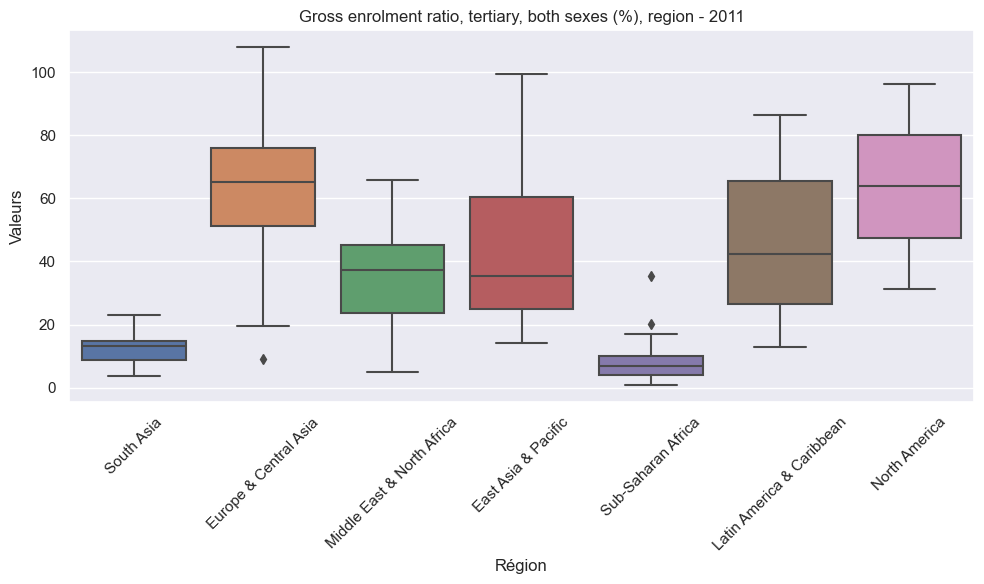

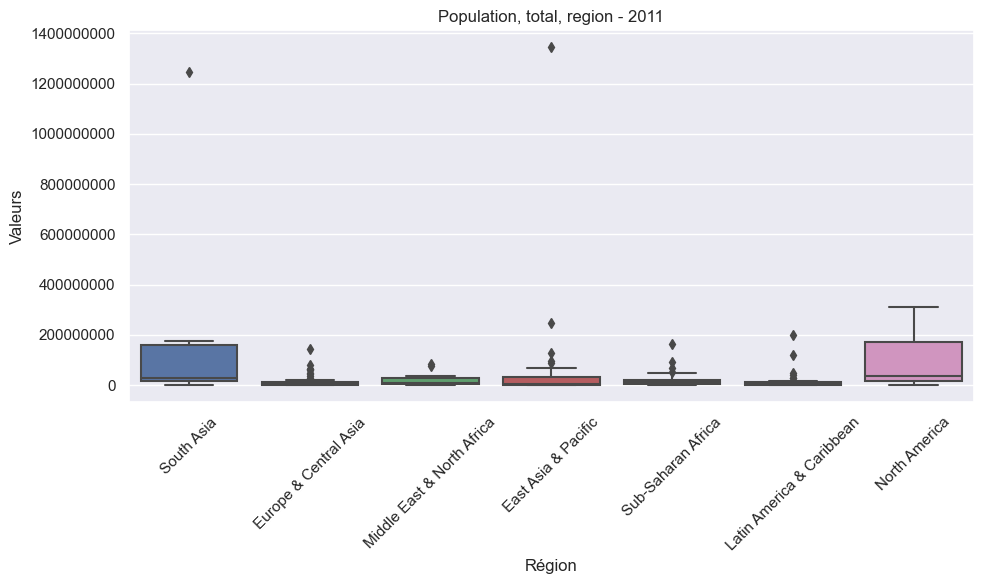

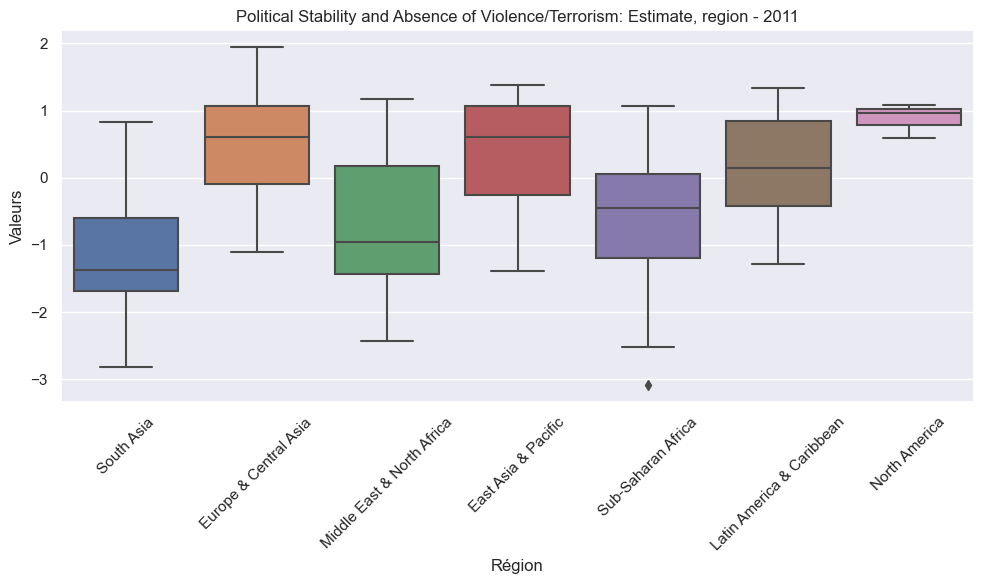

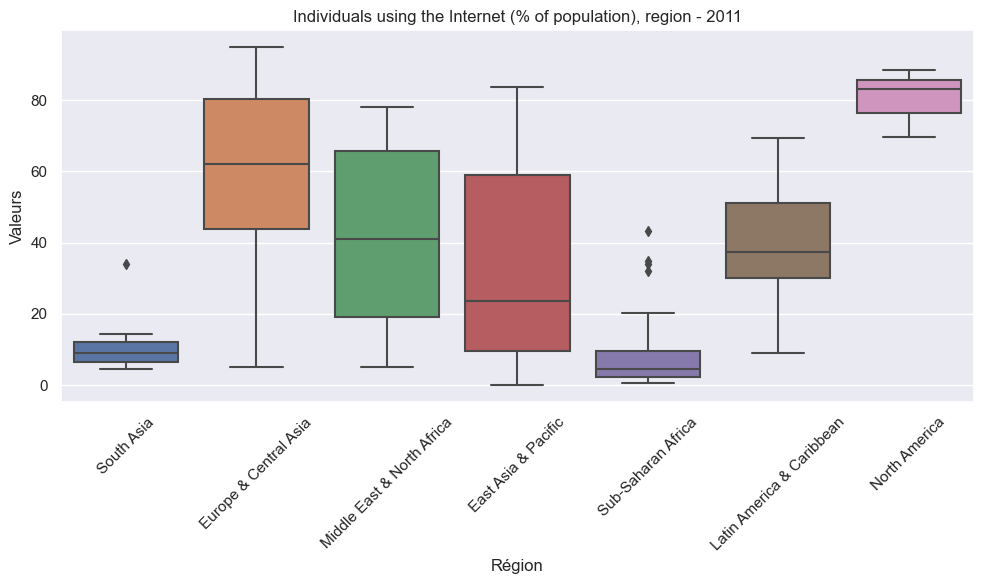

In [74]:
df_past_long_2011 = df_past_long[df_past_long['Year'] == '2011']

# Création de boxplots pour chaque indicateur
for indicator_code, indicator_name in indicators:
    df_indicator_2011 = df_past_long_2011[df_past_long_2011['Indicator Code'] == indicator_code]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_indicator_2011, x='Region', y='Value')
    plt.title(f'{indicator_name}, region - 2011')
    plt.xticks(rotation=45)
    plt.ylabel('Valeurs')
    plt.xlabel('Région')
    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    plt.show()




En analysant l'année 2011 (celle qui possédait le moins de valeurs manquantes), on peut déjà observer quelques informations par rapport à ces boxplots pour chaque indicateur.

**PIB** : Selon les régions, on peut voir différents niveaux de vie ainsi que des pouvoirs d'achats plus élevés.

**Secondaire** : Le taux d'inscription est relativement élevée, il y a une bonne couverture sur l'éducation à ce niveau. On note toutefois une légère inégalité sur certaines régions.

**Tertiaire** : La variabilité est encore plus grande que pour l'enseignement secondaire. On peut apercevoir toutefois une certaine limite à l'enchaînement secondaire => tertiaire selon la région.

**Population** : Sans surprise, on connait les quelques pays à avoir énormément d'habitants (Chine, Inde...), on sait par avance que cela peut facilement varier d'une région à l'autre.

**Stabilité politique** : Des médianes plutôt basses selon les régions. Cela peut indiquer une stabilité potentiellement plus faible et/ou des problèmes de violence.

**Internet** : Encore une fois, une variabilité significative selon les différentes régions.

Il y a des disparités régionales significatives selon les indicateurs qui peuvent impacter l'exporter des formations en ligne. Il faudrait potentiellement cibler les régions avec des bons niveaux en stabilité politique, d'accès à l'éducation et internet, pour améliorer les chances de trouver les pays pour exporter les programmes.

Cependant, on peut voir que la région "Sub-Saharan Africa" sur une très grande partie des indicateurs. On va regarder en détails pour vérifier si quelques pays peuvent être importants pour nos formations, sinon on avisera

### Lineplot sur une lignée temporelle

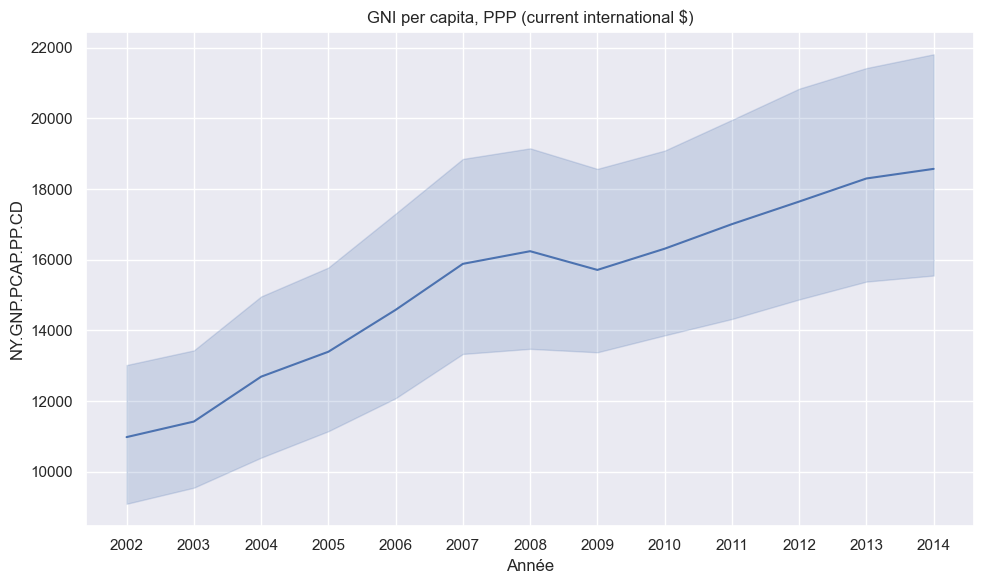

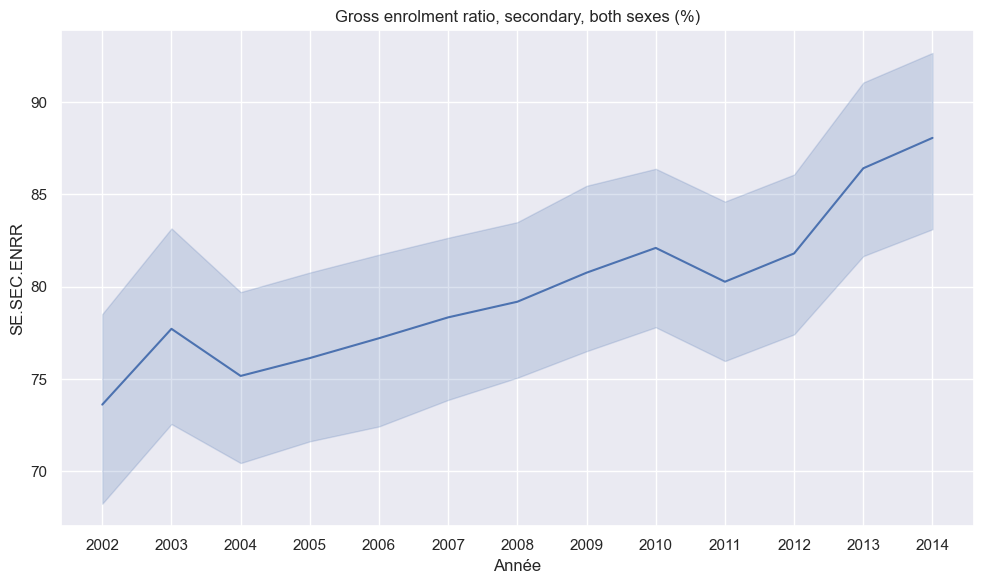

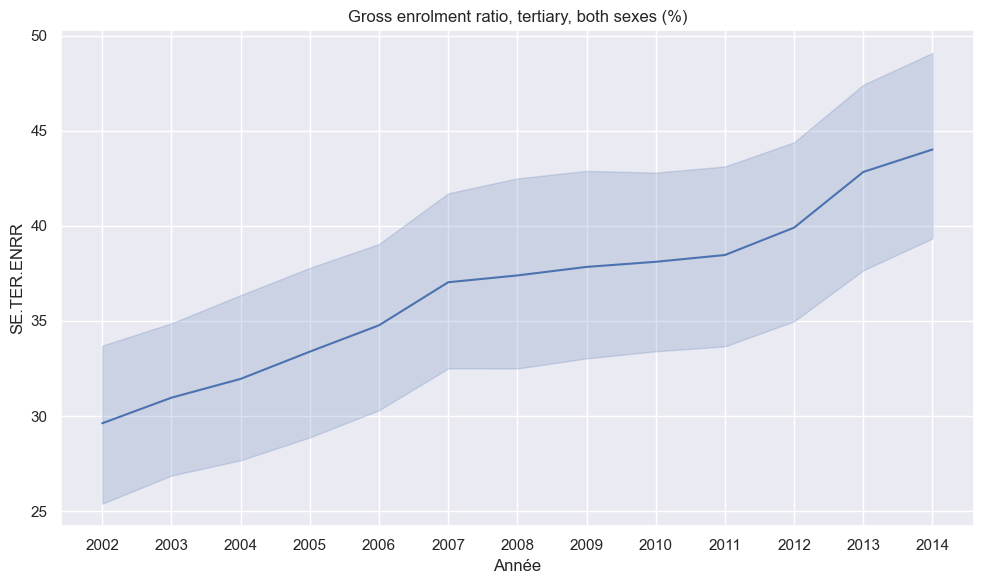

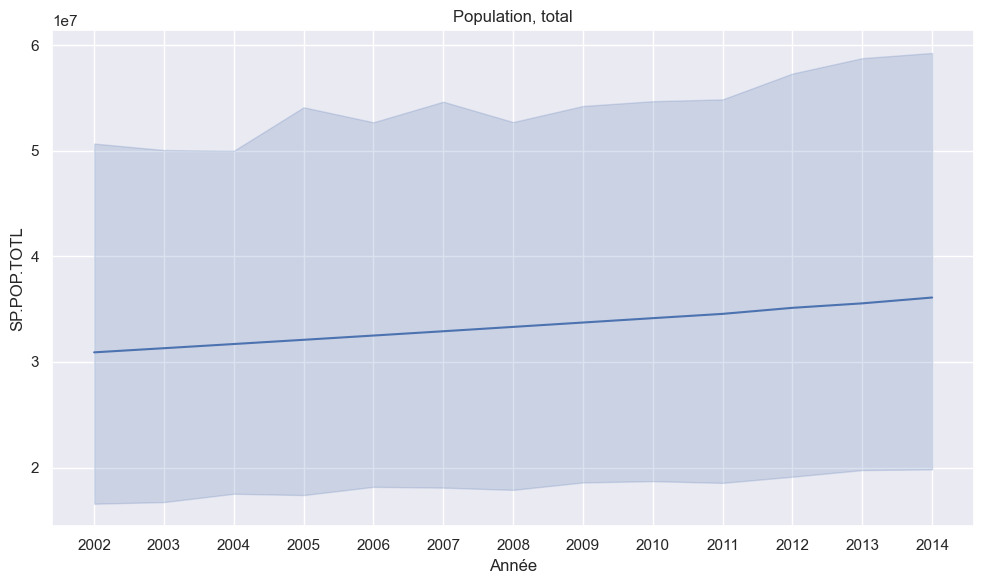

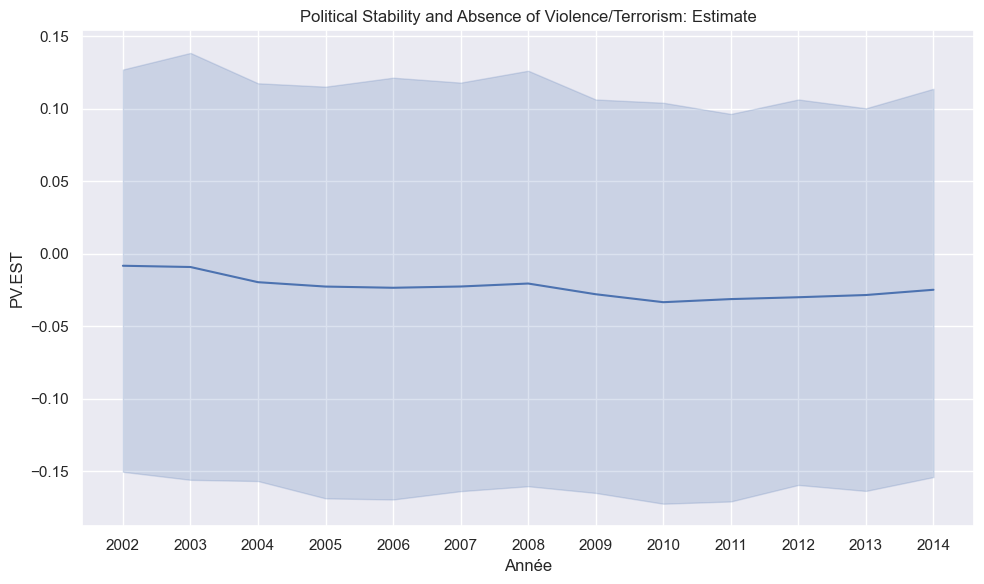

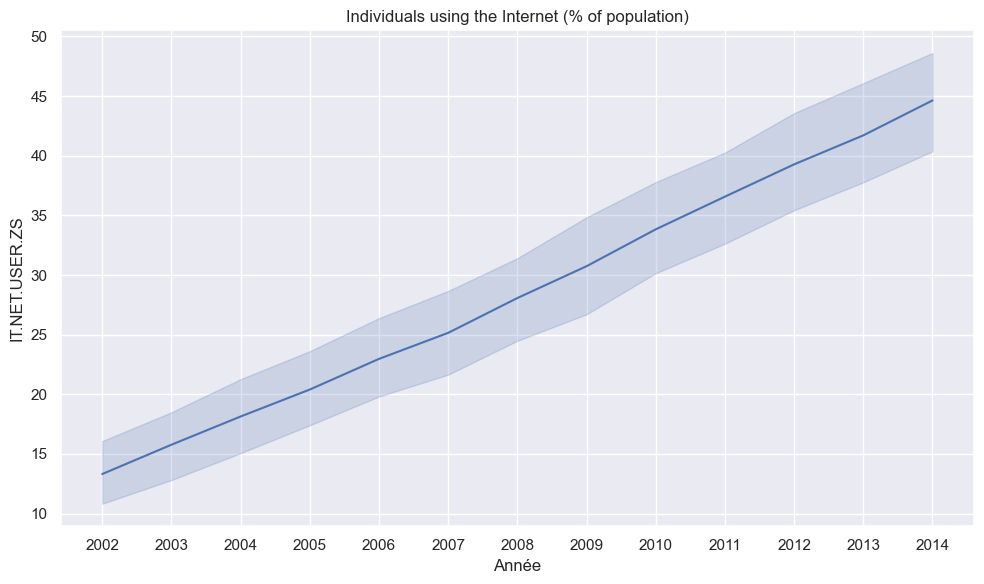

In [20]:
# Boucle pour créer les graphiques
for indicator_code, indicator_name in indicators:
    plt.figure(figsize=(10, 6))
    df_indicator = df_past_long[df_past_long['Indicator Code'] == indicator_code]
    sns.lineplot(data=df_indicator, x="Year", y="Value")
    plt.title(indicator_name)
    plt.ylabel(indicator_code)
    plt.xlabel("Année")
    plt.tight_layout()    
    plt.show()

### Analyse Sub-Saharan Africa

In [21]:
sub_saharan_africa_countries = df_past_long_2011.loc[df_past_long_2011['Region'] == 'Sub-Saharan Africa', :]
sub_saharan_africa_countries

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,Year,Value
10920,Angola,AGO,Upper middle income,Sub-Saharan Africa,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2011,5360.00
10921,Angola,AGO,Upper middle income,Sub-Saharan Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,2011,28.90
10922,Angola,AGO,Upper middle income,Sub-Saharan Africa,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2011,6.95
10923,Angola,AGO,Upper middle income,Sub-Saharan Africa,"Population, total",SP.POP.TOTL,2011,24218565.00
10924,Angola,AGO,Upper middle income,Sub-Saharan Africa,Political Stability and Absence of Violence/Te...,PV.EST,2011,-0.37
...,...,...,...,...,...,...,...,...
12095,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,2011,NaN
12096,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2011,5.82
12097,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Population, total",SP.POP.TOTL,2011,14386649.00
12098,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,Political Stability and Absence of Violence/Te...,PV.EST,2011,-0.95


In [22]:
sub_saharan_africa_countries = pd.pivot_table(sub_saharan_africa_countries,
                                             index={'Country Name'},
                                             columns={'Indicator Code'},
                                             values='Value')

In [23]:
sub_saharan_africa_countries.head()

Indicator Code,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,,,
Angola,4.70,5360.00,-0.37,28.90,6.95,24218565.00
Benin,4.15,1820.00,0.32,47.68,12.37,9460802.00
Botswana,9.00,13790.00,1.06,NaN,17.13,2051339.00
Burkina Faso,3.00,1420.00,-0.56,23.85,4.15,16081904.00
Burundi,1.11,770.00,-1.81,25.52,2.98,9043508.00


In [24]:
sub_saharan_africa_countries_top = {}

for indicator in indicators_dict.keys():
    sub_saharan_africa_countries_sorted = sub_saharan_africa_countries.sort_values(by=indicator, ascending=False)
    top_countries = sub_saharan_africa_countries_sorted.head(5).index.tolist()
    # Stockage des noms des pays dans le dictionnaire avec l'indicateur comme clé
    sub_saharan_africa_countries_top[indicator] = top_countries

In [25]:
sub_saharan_africa_countries_top

{'NY.GNP.PCAP.PP.CD': ['Equatorial Guinea',
  'Seychelles',
  'Mauritius',
  'Botswana',
  'Gabon'],
 'SE.SEC.ENRR': ['South Africa',
  'Mauritius',
  'Cabo Verde',
  'Seychelles',
  'Ghana'],
 'SE.TER.ENRR': ['Mauritius', 'Cabo Verde', 'Botswana', 'Sudan', 'Benin'],
 'SP.POP.TOTL': ['Nigeria',
  'Ethiopia',
  'Congo, Dem. Rep.',
  'South Africa',
  'Tanzania'],
 'PV.EST': ['Botswana', 'Mauritius', 'Seychelles', 'Namibia', 'Cabo Verde'],
 'IT.NET.USER.ZS': ['Seychelles',
  'Mauritius',
  'South Africa',
  'Cabo Verde',
  'Sao Tome and Principe']}

L'Afrique du Sud a l'air d'être un pays intéressant à garder d'après les résultats. On va le garder pour la suite.

In [26]:
# On filtre df_past_long pour exclure toutes les entrées de 'Sub-Saharan Africa' sauf 'South Africa'
df_past_long = df_past_long[
    (df_past_long['Region'] != 'Sub-Saharan Africa') |
    ((df_past_long['Region'] == 'Sub-Saharan Africa') & (df_past_long['Country Name'] == 'South Africa'))
]

In [27]:
df_past_long_2011 = df_past_long_2011[
    (df_past_long_2011['Region'] != 'Sub-Saharan Africa') |
    ((df_past_long_2011['Region'] == 'Sub-Saharan Africa') & (df_past_long_2011['Country Name'] == 'South Africa'))
]

## Filtrage et scoring des pays 

In [28]:
df_past_long_pivoted_2011 = df_past_long_2011.pivot_table(index=['Country Name', 'Region'],
                          columns='Indicator Code',
                          values='Value').reset_index()

In [29]:
df_past_long_pivoted_2011 = df_past_long_pivoted_2011.set_index('Country Name')
df_past_long_pivoted_2011.head()

Indicator Code,Region,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,,,,
Afghanistan,South Asia,5.00,1680.00,-2.50,54.62,3.76,29708599.00
Albania,Europe & Central Asia,47.00,10210.00,-0.28,90.85,49.67,2905195.00
Algeria,Middle East & North Africa,14.90,12850.00,-1.36,99.86,31.20,36819558.00
American Samoa,East Asia & Pacific,NaN,NaN,0.93,NaN,NaN,55320.00
Andorra,Europe & Central Asia,81.00,NaN,1.30,NaN,NaN,83751.00


In [30]:
df_past_long_pivoted_2011 = df_past_long_pivoted_2011[['Region','NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 
                                                       'SE.TER.ENRR', 'SP.POP.TOTL', 'PV.EST', 'IT.NET.USER.ZS']]

df_past_long_pivoted_2011.head()

Indicator Code,Region,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,PV.EST,IT.NET.USER.ZS
Country Name,,,,,,,
Afghanistan,South Asia,1680.00,54.62,3.76,29708599.00,-2.50,5.00
Albania,Europe & Central Asia,10210.00,90.85,49.67,2905195.00,-0.28,47.00
Algeria,Middle East & North Africa,12850.00,99.86,31.20,36819558.00,-1.36,14.90
American Samoa,East Asia & Pacific,NaN,NaN,NaN,55320.00,0.93,NaN
Andorra,Europe & Central Asia,NaN,NaN,NaN,83751.00,1.30,81.00


In [31]:
indicators_list = ['NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.TOTL', 'PV.EST', 'IT.NET.USER.ZS']

In [32]:
scaler = MinMaxScaler()
# On normalise et transforme les données issus des indicateurs
df_past_long_pivoted_2011[indicators_list] = scaler.fit_transform(df_past_long_pivoted_2011[indicators_list])
df_past_long_pivoted_2011[indicators_list].head()

Indicator Code,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,PV.EST,IT.NET.USER.ZS
Country Name,,,,,,
Afghanistan,0.00,0.18,0.00,0.02,0.06,0.05
Albania,0.07,0.55,0.44,0.00,0.53,0.50
Algeria,0.10,0.65,0.26,0.03,0.31,0.16
American Samoa,NaN,NaN,NaN,0.00,0.79,NaN
Andorra,NaN,NaN,NaN,0.00,0.87,0.85


In [33]:
population_weight = 0.10

In [34]:
total_weight_except_population = 1 - population_weight

In [35]:
equal_weight_others_indicators = total_weight_except_population / (len(indicators_list) - 1)

In [36]:
weights = [equal_weight_others_indicators if indicator != 'SP.POP.TOTL' else population_weight for indicator in indicators_list]
weights

[0.18, 0.18, 0.18, 0.1, 0.18, 0.18]

In [37]:
# On calcule un score pour chaque pays en multipliant ses indicateurs par les poids définis précédemment
df_past_long_pivoted_2011['Score'] = df_past_long_pivoted_2011[indicators_list].dot(weights)
df_past_long_pivoted_2011[['Score']].head()

Indicator Code,Score
Country Name,
Afghanistan,0.06
Albania,0.38
Algeria,0.27
American Samoa,NaN
Andorra,NaN


In [52]:
# On récupère les 20 pays ayant le meilleur score
best_countries = df_past_long_pivoted_2011.sort_values('Score', ascending=False).head(20)
best_countries

Indicator Code,Region,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,PV.EST,IT.NET.USER.ZS,Score
Country Name,,,,,,,,
Netherlands,Europe & Central Asia,0.39,0.95,0.71,0.01,0.83,0.96,0.69
Norway,Europe & Central Asia,0.52,0.78,0.67,0.00,0.87,0.99,0.69
Finland,Europe & Central Asia,0.33,0.73,0.88,0.00,0.88,0.94,0.68
Australia,East Asia & Pacific,0.33,1.00,0.77,0.02,0.79,0.84,0.67
Denmark,Europe & Central Asia,0.37,0.88,0.70,0.00,0.82,0.95,0.67
Iceland,Europe & Central Asia,0.28,0.74,0.74,0.00,0.85,1.00,0.65
New Zealand,East Asia & Pacific,0.25,0.85,0.75,0.00,0.88,0.86,0.65
Sweden,Europe & Central Asia,0.37,0.62,0.67,0.01,0.85,0.98,0.63
United States,North America,0.42,0.59,0.89,0.23,0.72,0.74,0.63


Sur nos 20 pays sélectionnés, on en retrouve quasiment 75% situés en Europe & Asie Centrale. Il y a tout de même quelques pays en Asie de l'ESt et dans le Pacifique, avec également les Etats-Unis.

Ces 20 pays combinent un bon score par rapport aux indicateurs choisis. Certains pays et leurs voisins sont naturellement sélectionnés, comme par exemple la France avec l'Espagne et la Suisse. Ou encore les pays scandinaves avec la Norvège, la Suède et le Danemark.

Du côté de l'Asie, avec le Japon, la Corée du Sud ou encore la Chine, on retrouve trois pays relativement proche avec quelques passifs mais qui ont tous les critères requis pour l'exportation de nos formations.

### Analyse visuelle des pays sélectionnés

In [39]:
best_countries_without_region = best_countries.drop(columns={'Region'}, axis=1)
best_countries_without_region

Indicator Code,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,PV.EST,IT.NET.USER.ZS,Score
Country Name,,,,,,,
Netherlands,0.39,0.95,0.71,0.01,0.83,0.96,0.69
Norway,0.52,0.78,0.67,0.00,0.87,0.99,0.69
Finland,0.33,0.73,0.88,0.00,0.88,0.94,0.68
Australia,0.33,1.00,0.77,0.02,0.79,0.84,0.67
Denmark,0.37,0.88,0.70,0.00,0.82,0.95,0.67
Iceland,0.28,0.74,0.74,0.00,0.85,1.00,0.65
New Zealand,0.25,0.85,0.75,0.00,0.88,0.86,0.65
Sweden,0.37,0.62,0.67,0.01,0.85,0.98,0.63
United States,0.42,0.59,0.89,0.23,0.72,0.74,0.63


In [40]:
best_countries_without_region.describe()

Indicator Code,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,PV.EST,IT.NET.USER.ZS,Score
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,0.36,0.75,0.69,0.03,0.79,0.85,0.62
std,0.14,0.13,0.12,0.05,0.08,0.10,0.04
min,0.19,0.59,0.49,0.00,0.60,0.63,0.55
25%,0.27,0.62,0.62,0.00,0.72,0.80,0.60
50%,0.33,0.72,0.69,0.01,0.80,0.85,0.61
75%,0.38,0.85,0.77,0.02,0.85,0.94,0.66
max,0.85,1.00,0.92,0.23,0.88,1.00,0.69


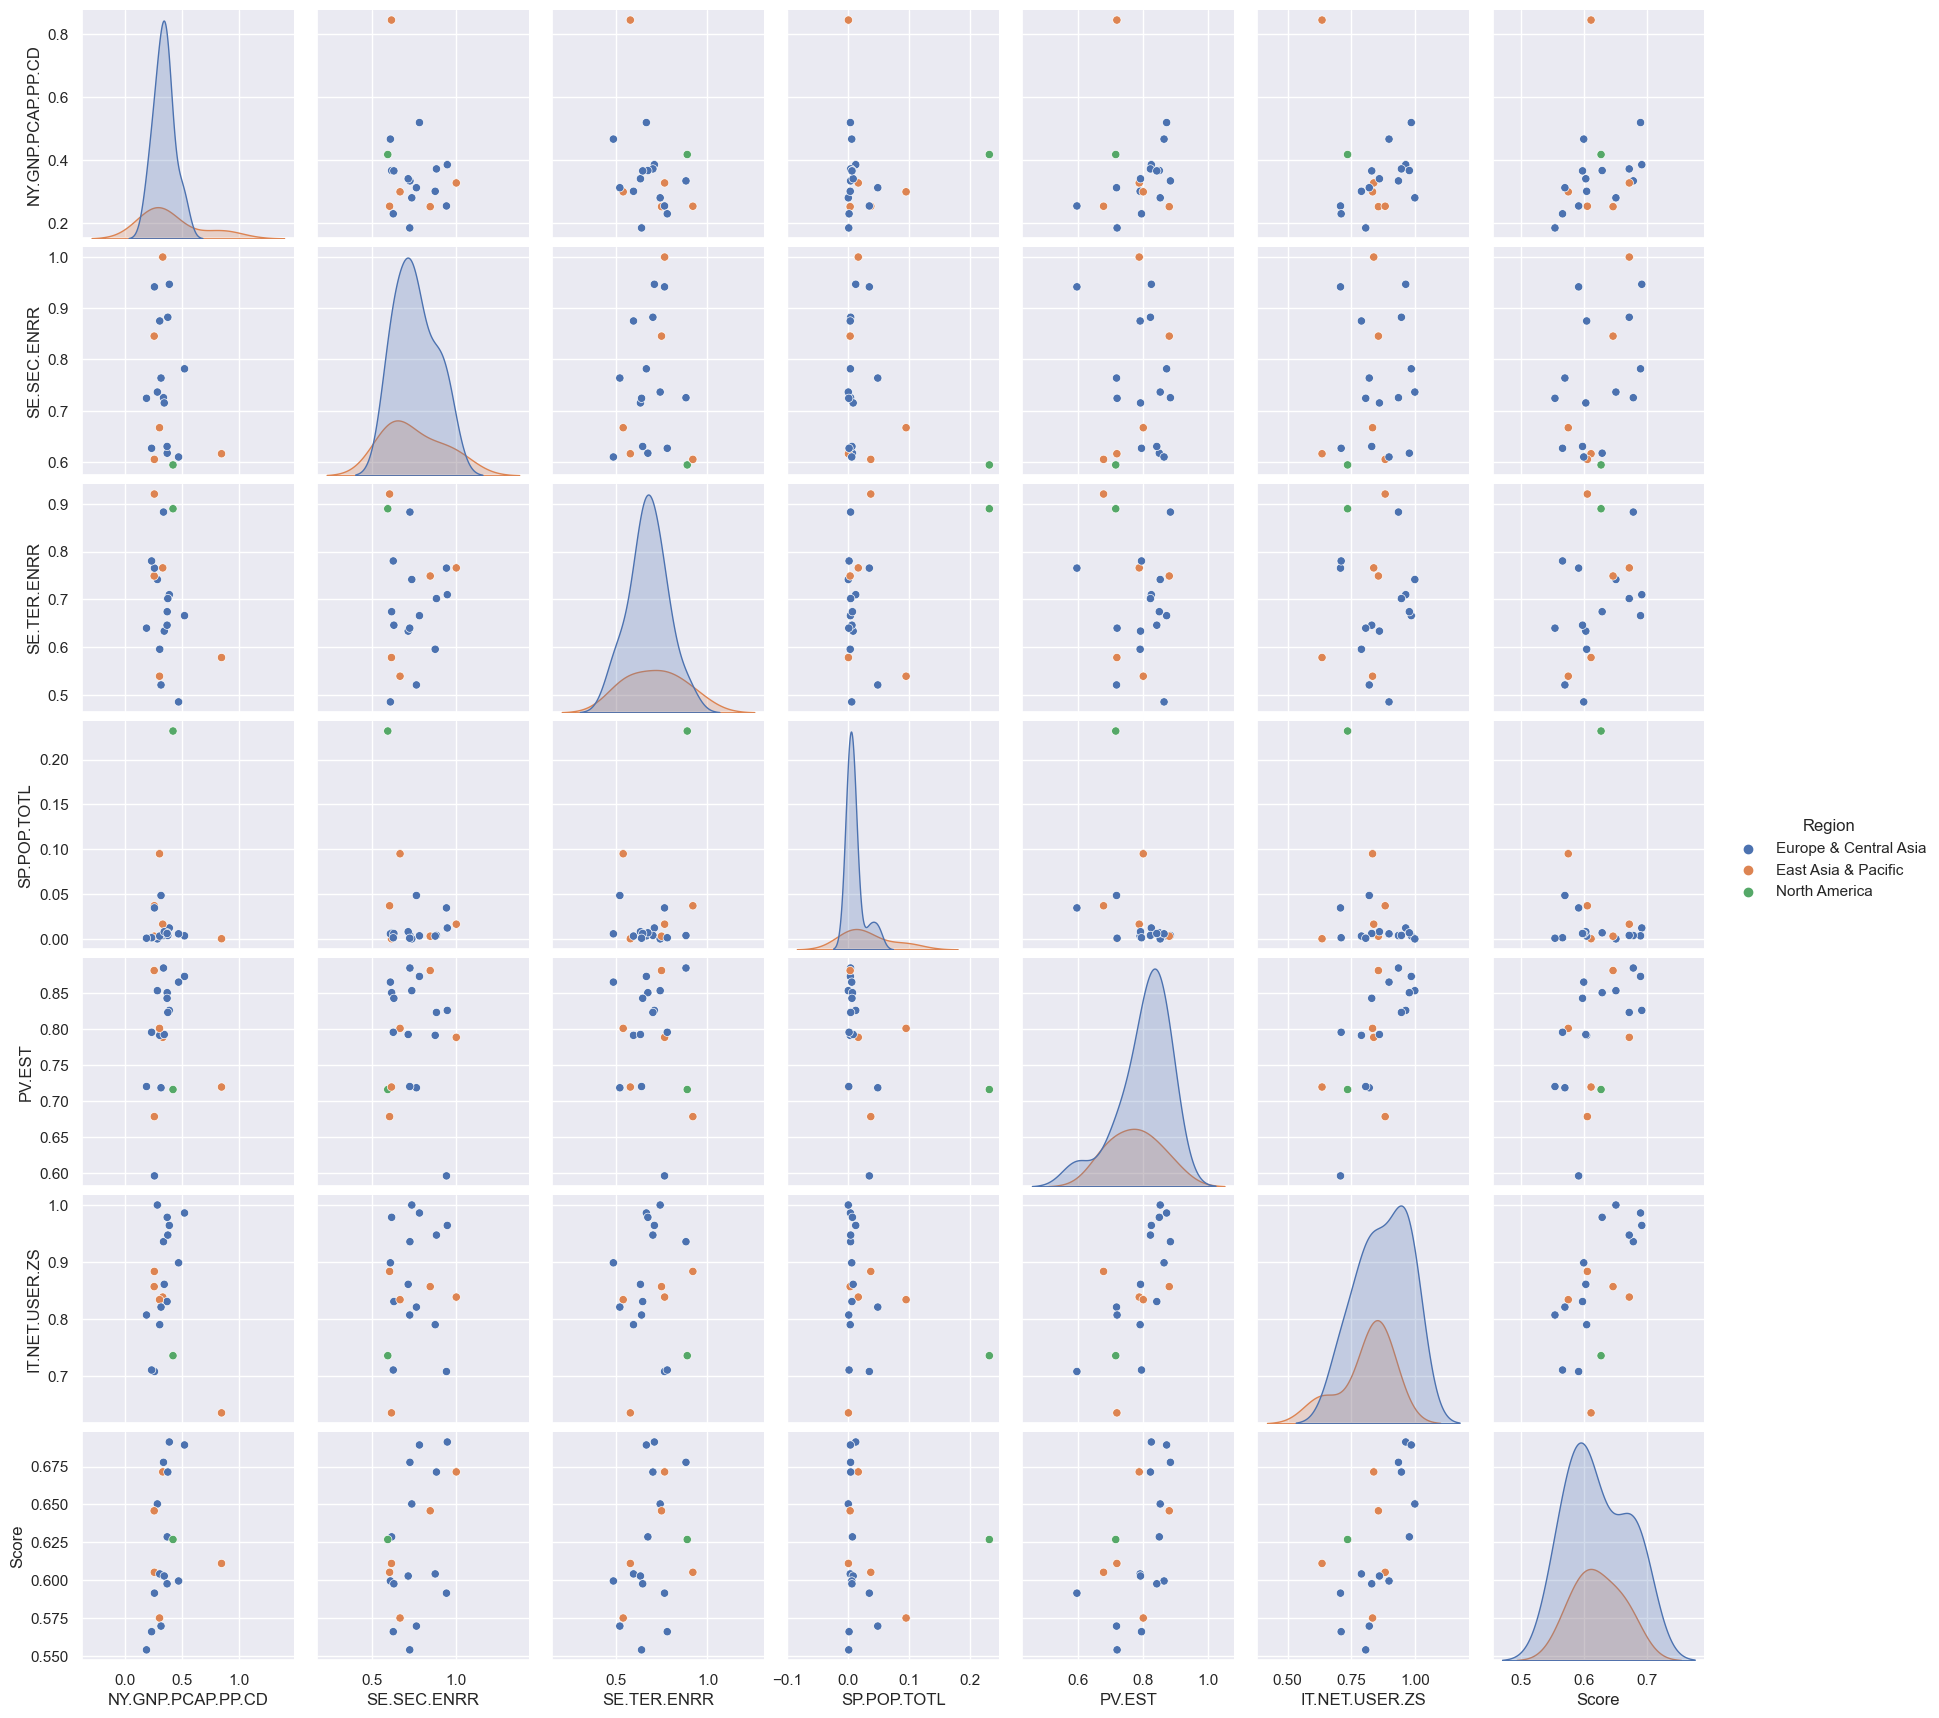

In [41]:
sns.pairplot(data=best_countries, hue='Region')
plt.show()

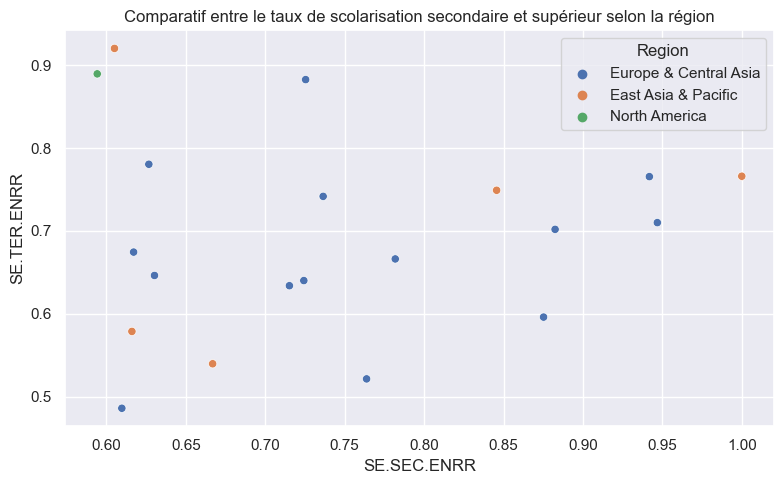

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=best_countries, x='SE.SEC.ENRR', y="SE.TER.ENRR", hue="Region")
plt.title("Comparatif entre le taux de scolarisation secondaire et supérieur selon la région")
plt.tight_layout()
plt.show()

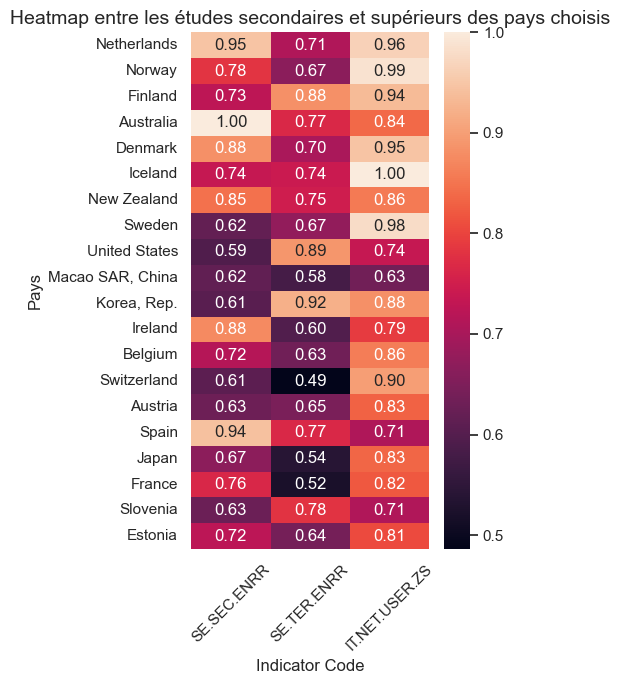

In [43]:
plt.figure(figsize=(5, 7))
sns.heatmap(data=best_countries_without_region[['SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.ZS']], annot=True, fmt='.2f')
plt.title("Heatmap entre les études secondaires et supérieurs des pays choisis", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

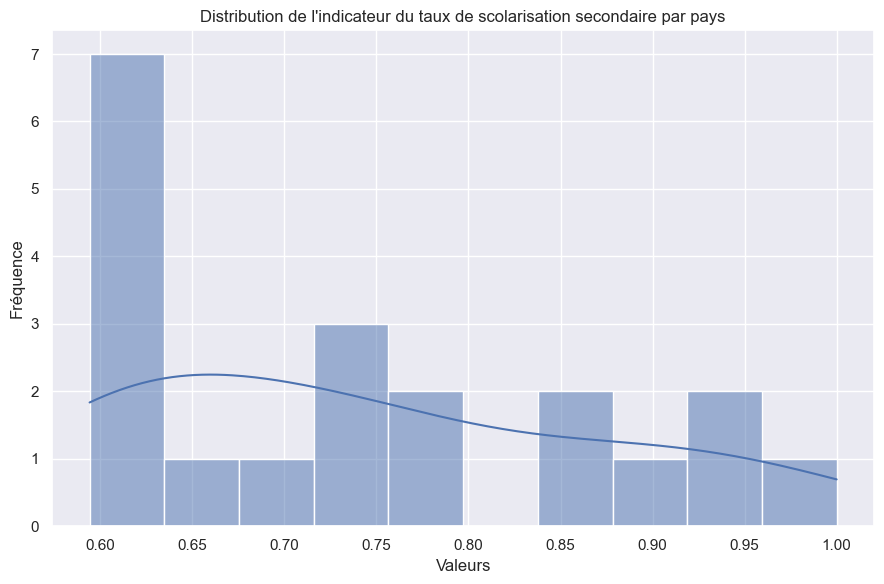

In [44]:
plt.figure(figsize=(9,6))
sns.histplot(best_countries_without_region['SE.SEC.ENRR'], kde=True, bins=10)
plt.title("Distribution de l'indicateur du taux de scolarisation secondaire par pays")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

Les données sont bien concentrées entre 0.60 et 1 concernant cet indicateur. Cela montre à nouveau que les pays sélectionnés ont un taux de scolarisation secondaire est relativement élevés.

### Vérification de valeurs aberrantes

In [45]:
# Calcul des percentiles et IQR
Q1 = best_countries_without_region['SP.POP.TOTL'].quantile(0.25)
Q3 = best_countries_without_region['SP.POP.TOTL'].quantile(0.75)
IQR = Q3 - Q1

In [46]:
# Définition des bornes pour identifier les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [47]:
# Identification des valeurs aberrantes
outliers_population = best_countries_without_region[(
    best_countries_without_region['SP.POP.TOTL'] < lower_bound) | (
    best_countries_without_region['SP.POP.TOTL'] > upper_bound)]

outliers_population['SP.POP.TOTL']

Country Name
United States   0.23
Japan           0.10
France          0.05
Name: SP.POP.TOTL, dtype: float64

On retrouve ces trois pays en valeurs aberrantes concernant la population, même si ce ne sont pas vraiment des valeurs aberrantes. C'est surtout nos trois pays qui ont le plus haut taux de population parmi ceux sélectionnés. Il faut donc les garder.
On peut aussi regarder le résultat avec une approche métier.

In [48]:
outliers_population_metier = best_countries_without_region[(
    best_countries_without_region['SP.POP.TOTL'] < 0) | (best_countries_without_region['SP.POP.TOTL'] > 1)]

outliers_population_metier

Indicator Code,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,PV.EST,IT.NET.USER.ZS,Score
Country Name,,,,,,,


### Cartographie des pays sélectionnés

In [49]:
best_countries_list = best_countries.index.tolist()

In [50]:
best_countries_coords = {
    'Netherlands': (52.1326, 5.2913),
    'Norway': (60.4720, 8.4689),
    'Finland': (61.9241, 25.7482),
    'Australia': (-25.2744, 133.7751),
    'Denmark': (56.2639, 9.5018),
    'Iceland': (64.9631, -19.0208),
    'New Zealand': (-40.9006, 174.8860),
    'United States': (37.0902, -95.7129),
    'Sweden': (60.1282, 18.6435),
    'Macao SAR, China': (22.1987, 113.5439),
    'Korea, Rep.': (35.9078, 127.7669),
    'Ireland': (53.4129, -8.2439),
    'Belgium': (50.5039, 4.4699),
    'Switzerland': (46.8182, 8.2275),
    'Austria': (47.5162, 14.5501),
    'Spain': (40.4637, -3.7492),
    'Japan': (36.2048, 138.2529),
    'France': (46.2276, 2.2137),
    'Slovenia': (46.1512, 14.9955),
    'Estonia': (58.5953, 25.0136),
}

# Création de la carte du monde
map = folium.Map(location=[0, 0], zoom_start=2)

# Ajout des pays sélectionnés avec un point rouge
for country in best_countries_list:
    folium.CircleMarker(
        location=best_countries_coords[country],
        radius=3,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(map)

# Affichage de la carte
map

Notre affichage visuel confirme la proximité des pays sélectionnés. On peut également compléter notre conclusion avec une tentative d'exportation du côté des Etats-Unis pour ensuite voir avec le Canada.

On note tout de même l'absence de pays en Amérique du Sud ou même en Afrique. Cela peut être dû à plusieurs raisons (stabilité politique, accès à l'internet et/ou à l'éducation...). A voir dans un futur avec l'Afrique du Sud par exemple.